# Train the Model VGG16

In [23]:

train_data, val_data = train_test_split(train, test_size=0.1)

early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=15,                 
    verbose=1,                 
    restore_best_weights=True  
)

checkpoint = ModelCheckpoint(
    'best_model.keras',        
    monitor='val_loss',        
    save_best_only=True,      
    verbose=1                  
)

epochs = 20
batch_size = 32
steps = len(train_data) // batch_size  

generator = data_generator(train_data, mapping, features, tokenizer, max_length, vocab_size, batch_size)

val_generator = data_generator(val_data, mapping, features, tokenizer, max_length, vocab_size, batch_size)

history = model.fit(
    generator,  
    epochs=epochs,  
    steps_per_epoch=steps,  
    verbose=1, 
    validation_data=val_generator, 
    validation_steps=len(val_data) // batch_size,  
    callbacks=[early_stopping, checkpoint]  
)


Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 5.8829
Epoch 1: val_loss improved from inf to 4.39073, saving model to best_model.keras
204/204 ━━━━━━━━━━━━━━━━━━━━ 57s 260ms/step - loss: 5.8797 - val_loss: 4.3907
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 4.1229
Epoch 2: val_loss improved from 4.39073 to 3.98451, saving model to best_model.keras
204/204 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - loss: 4.1222 - val_loss: 3.9845
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 3.6207
Epoch 3: val_loss improved from 3.98451 to 3.87483, saving model to best_model.keras
204/204 ━━━━━━━━━━━━━━━━━━━━ 53s 261ms/step - loss: 3.6203 - val_loss: 3.8748
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 3.3316
Epoch 4: val_loss improved from 3.87483 to 3.87375, saving model to best_model.keras
204/204 ━━━━━━━━━━━━━━━━━━━━ 55s 272ms/step - loss: 3.3313 - val_loss: 3.8738
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 3.1223
Epoch 5

In [24]:
model.save('VGG16model.keras')


**Traning Loss VGG16**

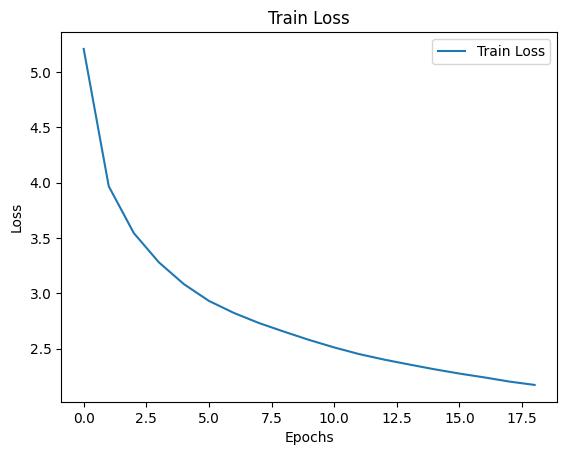

In [25]:

train_loss = history.history['loss']
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train Loss')
plt.show()
